# **Progetto Waze II**


Mi occupo della fase iniziale del progetto di analisi del **churn** per Waze. Dopo aver redatto la proposta di progetto e ispezionato i dati con Python, il mio prossimo compito è l'**analisi esplorativa dei dati (EDA)** e la **visualizzazione dei dati**.

Il mio obiettivo è preparare un **notebook Python** che dimostri l'esplorazione e la visualizzazione dei dati, destinato alla revisione della Direttrice dell'analisi dati di Waze. Devo rispondere a una serie di domande e redigere un **executive summary** basato sui risultati ottenuti.

# **Analisi esplorativa dei dati**

In questa attività, esaminererò i dati forniti e li preparerò per l'analisi.
<br/>

**Lo scopo** di questo progetto è condurre un'analisi esplorativa dei dati (EDA) su un set di dati fornito.

**L'obiettivo** è continuare l'analisi dei dati iniziata nel notebook precedente, aggiungendo visualizzazioni pertinenti che aiutino a comunicare la storia raccontata dai dati.
<br/>

*Questa attività si compone di 4 parti:*

**Parte 1:** Importazioni, collegamenti e caricamento

**Parte 2:** Esplorazione dei dati
* Pulizia dei dati

**Parte 3:** Creazione di visualizzazioni

**Parte 4:** Valutazione e condivisione dei risultati

<br/>

### **Importazioni e caricamento dei dati**

Per l'EDA dei dati, importo i dati e i pacchetti che saranno più utili, come pandas, numpy e matplotlib.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# caricamento dataset in formata Dataframe
df = pd.read_csv('waze_dataset.csv')

### **Esplorazione e pulizia dei dati**

Consider the following questions:



1.  Given the scenario, which data columns are most applicable?

2.  Which data columns can you eliminate, knowing they won’t solve your problem scenario?

3.  How would you check for missing data? And how would you handle missing data (if any)?

4.  How would you check for outliers? And how would handle outliers (if any)?








#### **Considerazioni sui dati utili all'analisi**

- Poiché sono interessato al tasso di abbandono degli utenti, la colonna `label` è essenziale. Oltre a `label`, le variabili legate al comportamento degli utenti saranno le più applicabili. Tutte le variabili sono legate al comportamento degli utenti, tranne `ID`.

- La colonna `ID` può essere omesso dall'analisi perché non sono interessato a identificare un utente specifico. `ID` non fornisce informazioni significative sul tasso di abbandono (a meno che `ID` non venga assegnato in base all'orario di registrazione dell'utente).

- Per verificare la presenza di dati mancanti, utilizzo `df.info()` e ispeziono la colonna `Non-Null Count`. La differenza tra il numero di valori non nulli e il numero di righe nei dati è il numero di valori mancanti per la variabile.

  - Se i dati mancanti sono completamente casuali (MCAR), ovvero il motivo della mancanza è indipendente dai valori dei dati stessi, posso procedere con un'analisi rimuovendo semplicemente le righe con valori mancanti. Altrimenti, dovrò indagare la causa principale della mancanza e assicurararmi che non interferisca con l'inferenza statistica e la modellazione.



#### **Panoramica dei dati e statistiche riepilogative**

Utilizzarò i seguenti metodi e attributi sul dataframe:

* `head()`
* `size`
* `describe()`
* `info()`

È sempre utile avere queste informazioni all'inizio di un progetto, dove è sempre possibile fare riferimento in caso di necessità.

In [3]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [4]:
df.size

194987

Generazione di statistiche riepilogative utilizzando il metodo `describe()`.

In [5]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


E informazioni riassuntive utilizzando il metodo `info()`.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


**Gestione dei dati**

Esistono tre opzioni principali per gestire i valori anomali: mantenerli così come sono, eliminarli o riassegnarli. Mantenere i valori anomali così come sono, eliminarli o riassegnarli è una decisione che prendo per ogni singolo dataset, in base agli obiettivi del modello che intendo costruire. Per aiutarmi a prendere la decisione, solitamente consulto queste linee guida:

* se sono sicuro che i valori anomali siano errori, refusi o errori e che il dataset verrà utilizzato per la modellazione o machine learning, è più probabile che decida di eliminarli. Delle tre opzioni, questa è quella che uso di meno.
* se il set di dati è piccolo e/o i dati verranno utilizzati per la modellazione o l'apprendimento automatico, è più probabile che scelga un percorso che preveda la creazione di nuovi valori per sostituire i valori anomali.
* per un set di dati su cui prevedo di eseguire EDA/analisi e nient'altro, o per un set di dati che sto preparando per un modello resistente ai valori anomali, è molto probabile che li lascerò.

### **Visualizzazioni**
Ora che so quali colonne di dati utilizzerò, è il momento di decidere quale visualizzazione dati è più adatta per l'EDA del dataset Waze.

* I box plot saranno utili per determinare i valori anomali e dove risiede la maggior parte dei punti dati in termini di `drive`, `sessioni` e tutte le altre variabili numeriche continue
* Gli istogrammi sono essenziali per comprendere la distribuzione delle variabili
* I grafici a dispersione saranno utili per visualizzare le relazioni tra le variabili
* I grafici a barre sono utili per comunicare livelli e quantità, soprattutto per le informazioni categoriali


Inizio esaminando la diffusione e la distribuzione delle variabili importanti utilizzando box plot e istogrammi.


#### **`sessions`**

Numero di volte in cui un utente apre l'app durante il mese.

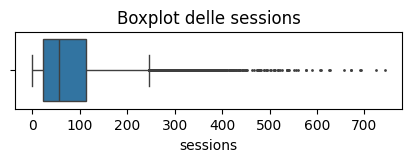

In [6]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('Boxplot delle sessions');

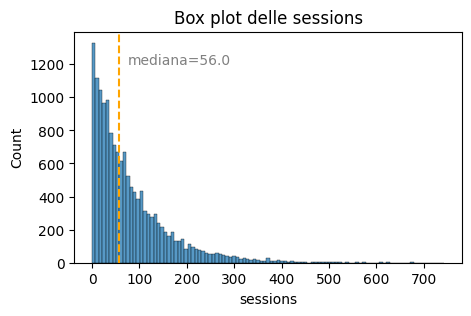

In [ ]:
# istogramma
plt.figure(figsize=(5,3))
sns.histplot(x=df['sessions'])
mediana = df['sessions'].median()
plt.axvline(mediana, color='orange', linestyle='--')
plt.text(75,1200, 'mediana=56.0', color='grey')
plt.title('Box plot delle sessions');

La variabile `sessions` presenta una distribuzione asimmetrica a destra, con metà delle osservazioni che ha 56 sessioni o meno. Tuttavia, come mostrato dal boxplot, alcuni utenti ne hanno più di 700.

#### **`drives`**

_Un evento di guida di almeno 1 km durante il mese_

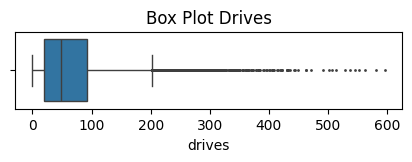

In [11]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('Box Plot Drives');

Il seguente blocco di codice definisce una funzione che aiuta a tracciare istogrammi con un particolare stile/formato utilizzando questo specifico set di dati.

In [12]:
# Funzione di supporto per tracciare istogrammi basati sul
# formato dell'istogramma `sessions`
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    mediana=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    plt.axvline(mediana, color='orange', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'mediana={mediana}', color='grey',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Mediana:', mediana)
    plt.title(f'{column_str} histogram');

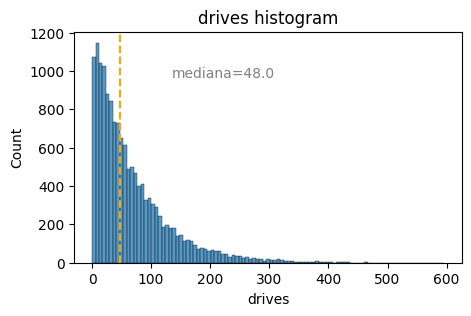

In [13]:
# Histogram
histogrammer('drives')

Le informazioni sulle drives seguono una distribuzione simile a quella della variabile sulle sessioni. Sono asimmetriche a destra, approssimativamente log-normali, con una mediana di 48. Tuttavia, alcuni conducenti hanno effettuato più di 400 guide nell'ultimo mese.

#### **`total_sessions`**

_Una stima del modello del numero totale di sessioni da quando un utente è stato inserito_

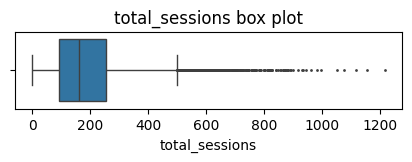

In [14]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.title('total_sessions box plot');

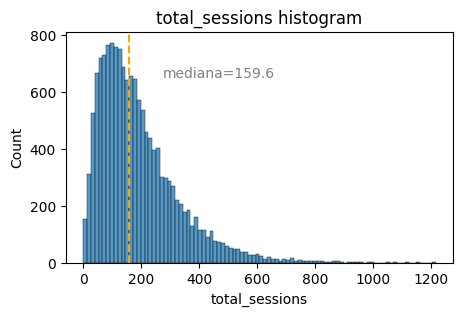

In [15]:
# Histogram
histogrammer('total_sessions')

`total_sessions` è una distribuzione asimmetrica a destra. Il numero totale mediano di sessioni è 159,6. Questa è un'informazione interessante perché, se il numero mediano di sessioni nell'ultimo mese era 56 e il numero totale di sessioni mediano era ~160, allora sembra che una parte significativa delle sessioni totali (stimate) di un utente potrebbe essere avvenuta nell'ultimo mese. Questo è un aspetto che potrei esaminare più attentamente in seguito.

#### **`n_days_after_onboarding`**

_Numero di giorni trascorsi da quando un utente si è registrato all'app_

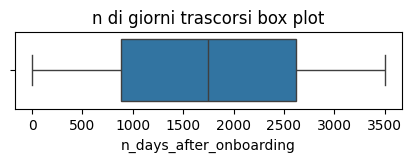

In [16]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['n_days_after_onboarding'], fliersize=1)
plt.title('n di giorni trascorsi box plot');

Mediana: 1741.0


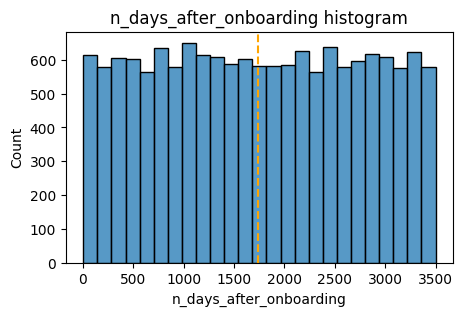

In [17]:
# Histogram
histogrammer('n_days_after_onboarding', median_text=False)

La durata totale dell'utente (ovvero il numero di giorni trascorsi dall'onboarding) presenta una distribuzione uniforme, con valori che vanno da quasi zero a circa 3.500 (circa 9,5 anni).

#### **`driven_km_drives`**

_Km totali percorsi durante il mese_

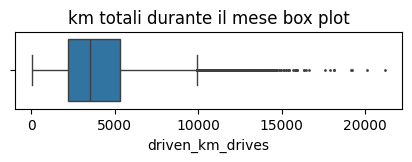

In [18]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driven_km_drives'], fliersize=1)
plt.title('km totali durante il mese box plot');

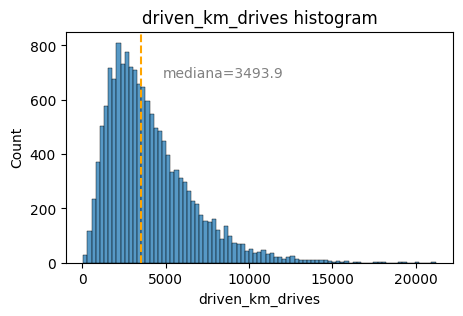

In [19]:
# Histogram
histogrammer('driven_km_drives')

Il numero di viaggi effettuati nell'ultimo mese per utente presenta una distribuzione asimmetrica a destra, con metà degli utenti che ha percorso meno di 3.495 chilometri. Come ho scoperto nell'analisi del notebook precedente, gli utenti di questo dataset guidano _molto_. La distanza più lunga percorsa nel mese è stata superiore alla metà della circonferenza terrestre.

#### **`duration_minutes_drives`**

_Durata totale di guida in minuti durante il mese_

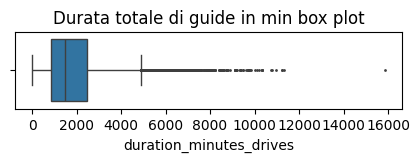

In [20]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['duration_minutes_drives'], fliersize=1)
plt.title('Durata totale di guide in min box plot');

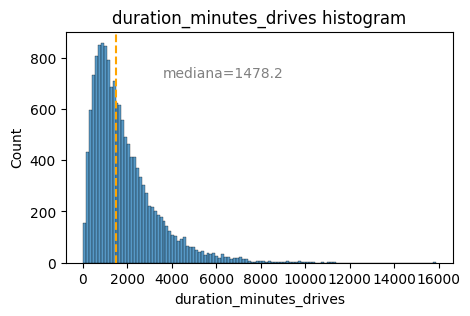

In [21]:
# Histogram
histogrammer('duration_minutes_drives')


La variabile `duration_minutes_drives` ha una coda fortemente sbilanciata a destra. Metà degli utenti ha guidato per meno di 1.478 minuti (25 ore), ma alcuni utenti hanno totalizzato oltre 250 ore nel mese.

#### **`activity_days`**

_Numero di giorni in cui l'utente apre l'app durante il mese_

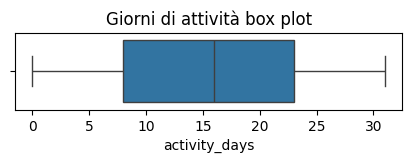

In [22]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['activity_days'], fliersize=1)
plt.title('Giorni di attività box plot');

Mediana: 16.0


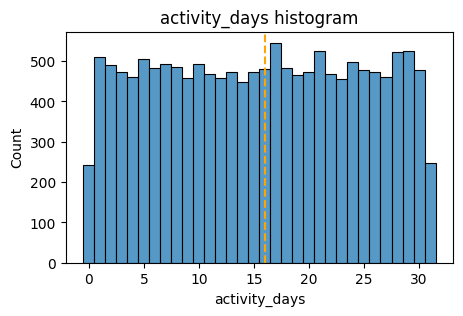

In [23]:
# Histogram
histogrammer('activity_days', median_text=False, discrete=True)

Nell'ultimo mese, gli utenti hanno aperto l'app in media 16 volte. Il box plot rivela una distribuzione centrata. L'istogramma mostra una distribuzione pressoché uniforme di circa 500 persone che hanno aperto l'app per ogni conteggio dei giorni. Tuttavia, ci sono circa 250 persone che non hanno aperto l'app affatto e circa 250 persone che l'hanno aperta tutti i giorni del mese.

Questa distribuzione è degna di nota perché non rispecchia la distribuzione delle `sessioni`, che si potrebbe pensare sia strettamente correlata a `activity_days`.

#### **`driving_days`**

_Numero di giorni in cui l'utente guida (almeno 1 km) durante il mese_

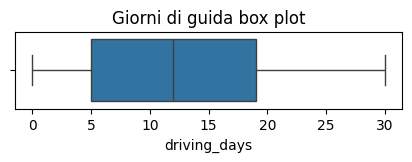

In [24]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driving_days'], fliersize=1)
plt.title('Giorni di guida box plot');

Mediana: 12.0


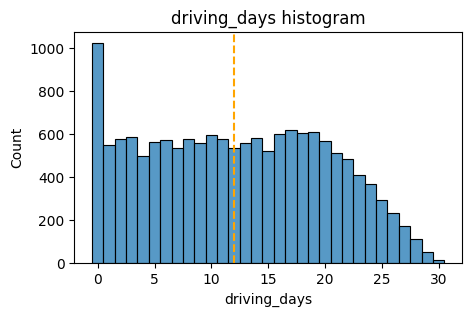

In [25]:
# Histogram
histogrammer('driving_days', median_text=False, discrete=True)

Il numero di giorni in cui gli utenti hanno guidato ogni mese è pressoché uniforme e in gran parte correlato al numero di giorni in cui hanno aperto l'app in quel mese, fatta eccezione per la distribuzione di `driving_days` che si assottiglia a destra.

Tuttavia, quasi il doppio degli utenti (circa 1.000 contro circa 550) non ha guidato affatto durante il mese. Questo potrebbe sembrare controintuitivo se considerato insieme alle informazioni di `activity_days`. Questa variabile mostrava circa 500 utenti che aprivano l'app nella maggior parte dei conteggi giornalieri, ma solo circa 250 utenti non hanno aperto l'app affatto durante il mese e circa 250 utenti l'hanno aperta ogni giorno. 
Servirebbero ulteriori analisi su questo dato.


#### **`device`**

_Il tipo di dispositivo con cui un utente avvia una sessione_

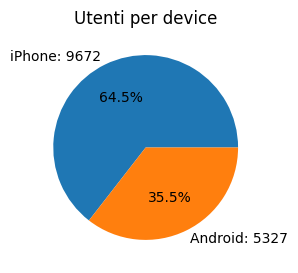

In [26]:
# Pie chart
fig = plt.figure(figsize=(3,3))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Utenti per device');

In questi dati sono rappresentati quasi il doppio degli utenti iPhone rispetto agli utenti Android.

#### **`label`**

_Variabile target binaria ("retained" vs "churned") per indicare se un utente ha abbandonato il sito in qualsiasi momento nel corso del mese_

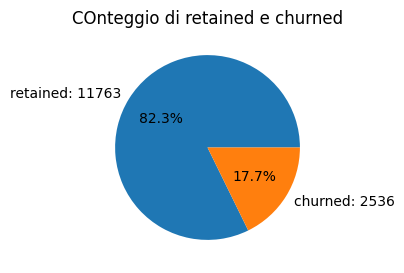

In [27]:
# Pie chart
fig = plt.figure(figsize=(3,3))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('COnteggio di retained e churned');

Meno del 18% degli utenti ha abbandonato il servizio Waze.

#### **`driving_days` vs. `activity_days`**

Poiché sia ​​`driving_days` che `activity_days` rappresentano il conteggio dei giorni nell'arco di un mese e sono anche strettamente correlati, è possibile rappresentarli insieme in un unico istogramma. Questo aiuterà a comprendere meglio la loro relazione senza dover scorrere avanti e indietro confrontando gli istogrammi in due punti diversi.

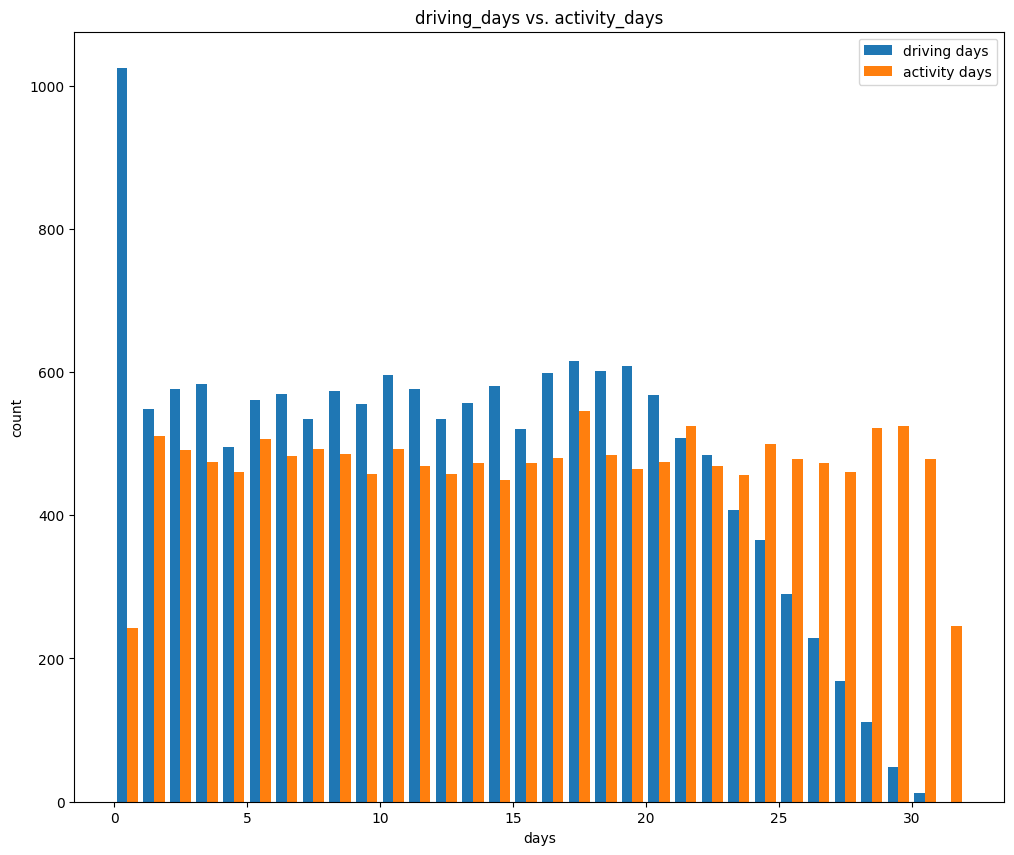

In [30]:
# Histogram
plt.figure(figsize=(12,10))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

Come osservato in precedenza, questo potrebbe sembrare controintuitivo. Dopotutto, perché ci sono _meno_ persone che non hanno usato l'app durante il mese e _più_ persone che non hanno guidato affatto durante il mese?

D'altra parte, potrebbe semplicemente illustrare il fatto che, sebbene queste variabili siano correlate tra loro, non sono la stessa cosa. Probabilmente le persone aprono l'app più spesso di quanto la usino per guidare, forse per controllare i tempi di guida o le informazioni sul percorso, per aggiornare le impostazioni o anche solo per errore.


Ora confermo il numero massimo di giorni per ciascuna variabile: `driving_days` e `activity_days`.

In [31]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


Sebbene sia possibile che nessun utente abbia guidato per tutti i 31 giorni del mese, è altamente improbabile, considerando che nel set di dati sono rappresentate 15.000 persone.

Un altro modo per verificare la validità di queste variabili è tracciare un semplice grafico a dispersione con l'asse x che rappresenta una variabile e l'asse y che rappresenta l'altra.

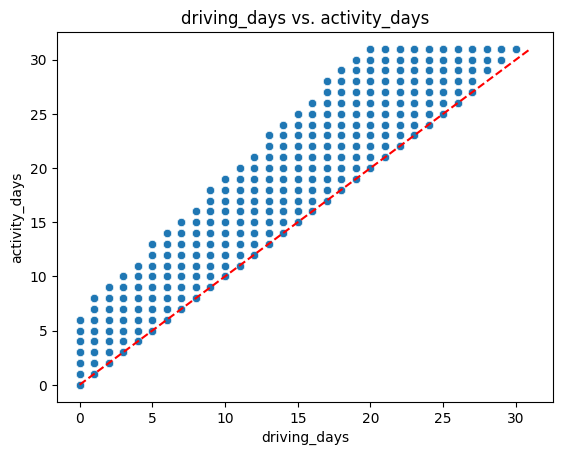

In [32]:
# Scatter plot
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

Il numero di giorni in cui si guida non può mai essere superiore al numero di giorni in cui si usa l'app. Se si guida con l'app, necessariamente la si sta usando. Quindi, se in un anno usi l'app per 100 giorni, i giorni di guida possono essere al massimo 100, non 101 o di più. I dati fortunatamente rispettano questa logica.

#### **Retention per device**

Traccio un istogramma con quattro barre, una per ogni combinazione device-label, per mostrare quanti utenti iPhone sono stati mantenuti/abbandonati e quanti utenti Android sono stati mantenuti/abbandonati.

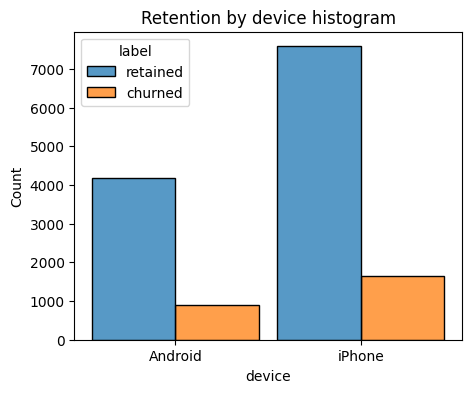

In [33]:
# Histogram
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

La proporzione tra utenti chruned e utenti retained è coerente tra i diversi tipi di dispositivi.

#### **Fidelizzazione per chilometri percorsi per giorno di guida**

Nel notebook precendente, ho scoperto che la distanza media percorsa per giorno di guida il mese scorso per gli utenti che hanno abbandonato il servizio era di 697,54 km, contro i 289,55 km per gli utenti che non hanno abbandonato il servizio. 

Per approfondire questo aspetto:

1. Creo una nuova colonna in `df` chiamata `km_per_driving_day`, che rappresenta la distanza media percorsa per giorno di guida per ciascun utente.

2. Utilizzo il metodo `describe()` sulla nuova colonna.

In [36]:
#1. Creo un colonna km per driving day
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

df['km_per_driving_day'].describe(include="all")

/opt/miniconda3/envs/pydata-book/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Il valore medio è infinito, la deviazione standard è NaN e il valore massimo è infinito.

Questo è il risultato della presenza di valori pari a zero nella colonna `driving_days`. Pandas imputa un valore pari a infinito nelle righe corrispondenti della nuova colonna perché la divisione per zero non è definita.

Per correggere:
1. Converto questi valori da infinito a zero. 

2. `describe()` sulla colonna `km_per_driving_day` per verificare che abbia funzionato.

In [37]:
# 1. Converto valori infiniti in 0

df.loc[df['km_per_driving_day']== np.inf, 'km_per_driving_day'] = 0

# 2. Confermo che ha funzionato
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

Il valore massimo è 15.420 chilometri _per giorno di guida_. Questo è fisicamente impossibile. Guidare a 100 km/h per 12 ore equivale a 1.200 km. È improbabile che molte persone abbiano percorso in media più di questo valore ogni giorno di guida, quindi, per ora, ignoro le righe in cui la distanza in questa colonna è superiore a 1.200 km.

Traccio un istogramma della nuova colonna `km_per_driving_day`, ignorando gli utenti con valori superiori a 1.200 km. 

Ogni barra dovrebbe avere la stessa lunghezza e due colori, uno che rappresenta la percentuale di utenti churned in quella barra e l'altro che rappresenta la percentuale di utenti retained. 

> Questo può essere fatto impostando il parametro `multiple` della funzione [`histplot()`]

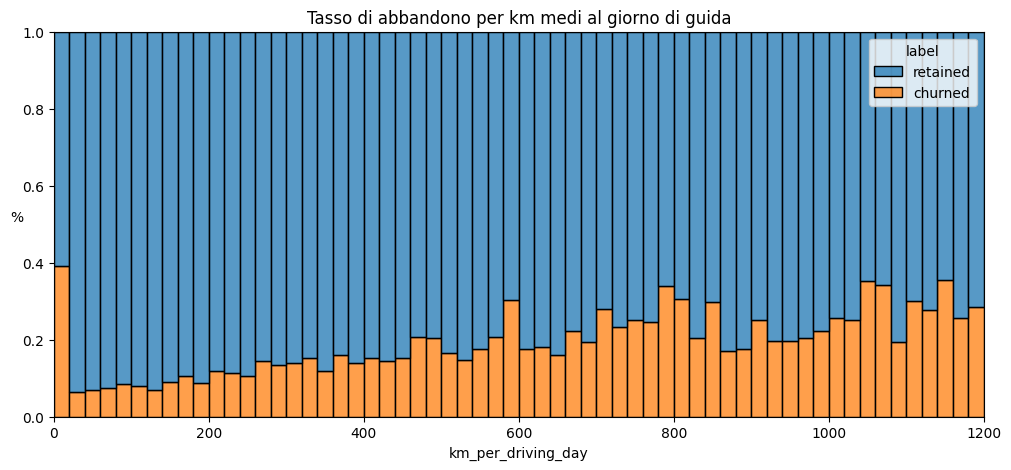

In [38]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Tasso di abbandono per km medi al giorno di guida');

Il tasso di abbandono tende ad aumentare con l'aumentare della distanza media giornaliera percorsa, confermando quanto riscontrato nel notebook precedente. Varrebbe la pena indagare ulteriormente le ragioni per cui gli utenti che percorrono lunghe distanze interrompono l'utilizzo dell'app.

#### **Tasso di abbandono per numero di giorni di guida**

Creo un altro istogramma come il precedente, solo che questa volta dovrebbe rappresentare il tasso di abbandono per ogni numero di giorni di guida.

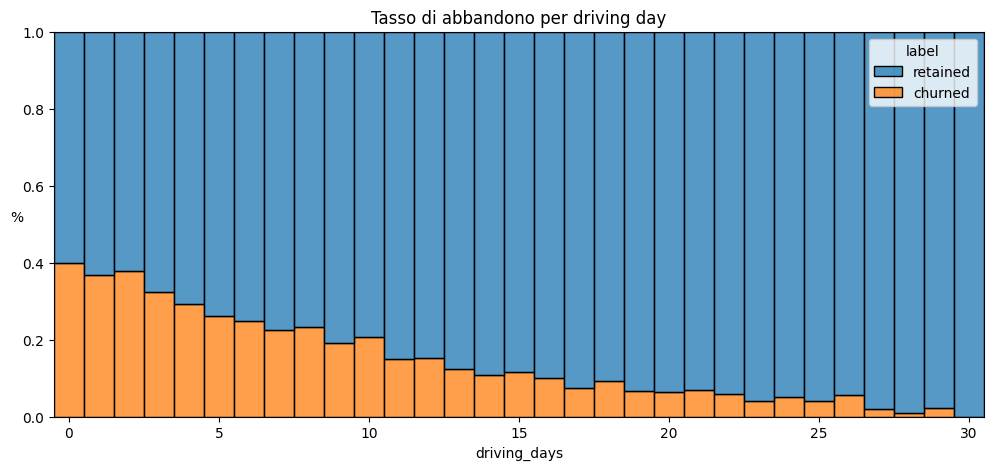

In [39]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Tasso di abbandono per driving day');

Il tasso di abbandono è più elevato tra gli utenti che hanno usato Waze raramente nell'ultimo mese. All'aumentare della frequenza d'uso dell'app, la probabilità di abbandono diminuisce. Ad esempio, il 40% degli utenti che non hanno usato l'app il mese precedente l'ha disinstallata, mentre nessuno di quelli che l'hanno usata per 30 giorni ha abbandonato.

Questo risultato è prevedibile. Se gli utenti abituali abbandonassero l'app, ciò suggerirebbe insoddisfazione. Quando a disinstallare l'app sono gli utenti che la usano di rado, le ragioni possono essere diverse: insoddisfazione passata o semplicemente un minor bisogno di un'app di navigazione, per esempio dopo essersi trasferiti in una città con un buon sistema di trasporto pubblico.

#### **Percentuale di sessioni registrate nell'ultimo mese**

Creo una nuova colonna `percent_sessions_in_last_month` che rappresenti la percentuale delle sessioni totali di ciascun utente registrate nell'ultimo mese di utilizzo.

In [40]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

Qual è il valore mediano della nuova colonna?

In [41]:
df['percent_sessions_in_last_month'].median()

np.float64(0.42309702992763176)

Ora, creo un istogramma che rappresenti la distribuzione dei valori in questa nuova colonna.

Mediana: 0.4


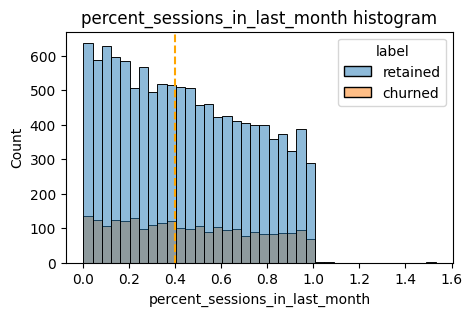

In [42]:
# Histogram
histogrammer('percent_sessions_in_last_month',
             hue=df['label'],
             multiple='layer',
             median_text=False)

Controllo il valore mediano della variabile `n_days_after_onboarding`.

In [43]:
df['n_days_after_onboarding'].median()

np.float64(1741.0)

Metà delle persone nel set di dati ha avuto il 40% o più delle proprie sessioni solo nell'ultimo mese, eppure il tempo mediano complessivo trascorso dall'onboarding è di quasi cinque anni.

Creo un istogramma di `n_giorni_dopo_l'onboarding` solo per le persone che hanno avuto il 40% o più delle proprie sessioni totali nell'ultimo mese.

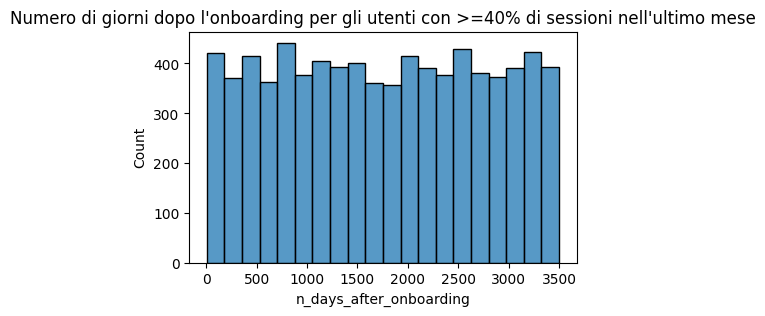

In [45]:
# Histogram
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title("Numero di giorni dopo l'onboarding per gli utenti con >=40% di sessioni nell'ultimo mese");

Il numero di giorni trascorsi dall'onboarding per gli utenti con il 40% o più delle loro sessioni totali avvenute solo nell'ultimo mese presenta una distribuzione uniforme. Questo è molto strano. Vale la pena chiedere a Waze perché così tanti utenti di lunga data abbiano improvvisamente utilizzato l'app così tanto nell'ultimo mese.

### **Gestione dei valori anomali**

I box plot della sezione precedente hanno indicato che molte di queste variabili presentano valori anomali. Questi valori anomali non sembrano essere errori di inserimento dati; sono presenti a causa delle distribuzioni asimmetriche a destra.

A seconda dell'utilizzo che si intende fare di questi dati, potrebbe essere utile imputare ai dati anomali valori più ragionevoli. Un modo per eseguire questa imputazione è impostare una soglia basata su un percentile della distribuzione.

Per mettere in pratica questa tecnica, userò una funzione che calcoli il 95° percentile di una determinata colonna, quindi imputi i valori > al 95° percentile con il valore al 95° percentile, come il 95° percentile della distribuzione.



In [48]:
def outlier_imputer(column_name, percentile):
    # Calcola la soglia
    threshold = df[column_name].quantile(percentile)
    # Soglia di imputazione per valori > soglia
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | imputazione: {}'.format(column_name, percentile, threshold))

Ora applico la funzione alle seguenti colonne:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [49]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | imputazione: 243.0
                   drives | percentile: 0.95 | imputazione: 201.0
           total_sessions | percentile: 0.95 | imputazione: 454.3632037399997
         driven_km_drives | percentile: 0.95 | imputazione: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | imputazione: 4668.899348999998


describe() per controllo

In [50]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


#### **Conclusione**

L'analisi ha rivelato che il tasso di abbandono complessivo è di circa il 17% e che questo tasso è coerente tra gli utenti iPhone e quelli Android.

Inoltre, l'EDA ha rivelato che gli utenti che percorrono lunghe distanze nei giorni in cui guidano hanno _maggiori_ probabilità di abbandono, mentre gli utenti che guidano più spesso hanno _meno_ probabilità di abbandono. Il motivo di questa discrepanza è un'opportunità per ulteriori indagini e sarebbe un altro argomento da chiedere al team dati di Waze.

#### **Osservazioni**
* Ci sono dati mancanti nell'etichetta di **abbandono degli utenti** (`user churn`), quindi potrebbe essere necessaria un'ulteriore elaborazione dei dati prima dell'analisi.
* Ci sono molte osservazioni anomale per i **viaggi** (`drives`), quindi potremmo considerare una trasformazione delle variabili per stabilizzare la variazione.
* Il numero di viaggi e il numero di sessioni sono entrambi fortemente correlati, quindi potrebbero fornire informazioni ridondanti se li includiamo entrambi in un modello.
* In media, gli **utenti mantenuti** (`retained`) hanno meno viaggi degli **utenti che hanno abbandonato** (`churned`).

Le mie altre domande sono...

* Da cosa dipende la mancanza di dati nell'etichetta di abbandono degli utenti?
* Chi sono gli utenti con un numero estremamente elevato di viaggi? Sono autisti di ridesharing o autisti commerciali?
* Perché gli utenti mantenuti hanno meno viaggi degli utenti che hanno abbandonato? È forse perché gli utenti che hanno abbandonato hanno una cronologia di utilizzo di Waze più lunga?
* Qual è il profilo demografico degli utenti mantenuti e degli utenti che hanno abbandonato?

### **1. Distribuzione delle variabili**

Quasi tutte le variabili mostrano una distribuzione fortemente asimmetrica a destra o una distribuzione uniforme.
* **Distribuzione asimmetrica a destra**: indica che la maggior parte degli utenti ha valori bassi per quella variabile.
* **Distribuzione uniforme**: indica che la probabilità di trovare un utente con un valore in qualsiasi punto del range è più o meno uguale.

### **2. Problemi o anomalie nei dati**

I dati non presentano problemi gravi, e nessuna singola variabile sembra del tutto errata. Tuttavia, sono state riscontrate diverse anomalie:
* **Valori anomali**: variabili come `driven_km_drives` contengono valori altamente improbabili.
* **Variabili mensili**: `activity_days` ha un valore massimo di 31, mentre `driving_days` ha un massimo di 30. Questo suggerisce che i dati potrebbero non essere stati raccolti nello stesso mese per entrambe le variabili, il che potrebbe essere problematico per l'analisi.

### **3. Domande per il team di Waze**

L'indagine ha sollevato alcune domande che meritano un approfondimento:
* **Conferma della raccolta dati**: è necessario chiedere al team se le variabili mensili sono state raccolte nello stesso periodo, dato il differente numero massimo di giorni.
* **Cambiamenti nell'uso dell'app**: è importante capire perché molti utenti di lunga data hanno iniziato a usare l'app così intensamente nell'ultimo mese. Ci sono stati cambiamenti recenti che potrebbero spiegare questo comportamento?

### **4. Tasso di abbandono e mantenimento degli utenti**

* **Utenti che hanno abbandonato**: meno del 18%.
* **Utenti mantenuti**: circa l'82%.

### **5. Fattori correlati all'abbandono degli utenti**

* **Distanza percorsa per giorno di guida (`distance driven per driving day`)**: c'è una correlazione positiva. Più un utente percorre in un singolo giorno di guida, maggiore è la probabilità che abbandoni l'app.
* **Numero di giorni di guida (`number of driving days`)**: c'è una correlazione negativa. Gli utenti che hanno guidato per più giorni nell'ultimo mese hanno una minore probabilità di abbandonare.

### **6. Rappresentatività degli utenti**

Nel dataset, gli utenti più recenti non sono più rappresentati di quelli meno recenti . L'istogramma per la variabile `n_days_after_onboarding` mostra una distribuzione uniforme, il che indica che utenti di tutte le anzianità (da nuovi a circa 10 anni) sono distribuiti in modo relativamente equilibrato.